<a href="https://colab.research.google.com/github/cramirez98/ProyectoAprendizajeAutomatico/blob/main/ProyectoAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import output

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/cramirez98/ProyectoAprendizajeAutomatico.git

Cloning into 'ProyectoAprendizajeAutomatico'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 30 (delta 10), reused 22 (delta 4), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [ ]:
!python3 ProyectoAprendizajeAutomatico/paquetes.py

La lista de paquetes se cargo correctamente


In [2]:
%load_ext rpy2.ipython

In [4]:
%R package_list <- read.csv("paquetes.csv", header= T)$PAQUETES

'knitr','class','tidyverse',...,'skimr','corrgram','openxlsx'


In [ ]:
%R start_time <- Sys.time()
%R missin_packages <- package_list[!(package_list %in% installed.packages()[,"Package"])]

%R if(length(missin_packages)) install.packages(missin_packages)
output.clear()

%R end_time <- Sys.time()
%R end_time - start_time)

In [5]:
%R lapply(package_list, require, character.only = TRUE)
output.clear()

R[write to console]: Loading required package: knitr

R[write to console]: Loading required package: class

R[write to console]: Loading required package: tidyverse

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Loading required package: GGally

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

R[write to console]: Loading required package: corrplot

R[write to console]: corrplot 0.92 loaded

R[write to console]: Loading required package: gridExtra

R[write to console]: 
Attaching package: ‘gridExtra’


R[write to cons

<rpy2.robjects.vectors.ListVector object at 0x7fd74c660f50> [RTYPES.VECSXP]
R classes: ('list',)
[BoolSexpV..., BoolSexpV..., BoolSexpV..., BoolSexpV..., ..., BoolSexpV..., BoolSexpV..., BoolSexpV..., BoolSexpV...]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd743420d70> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd75760b910> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd751241500> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd751241370> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
...
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd74c5d4050> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd74c5d4280> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd76242afa0> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]
  <no name>: <class 'rpy2.robjects.vectors.BoolVector'>
  <rpy2.robjects.vectors.BoolVector object at 0x7fd743422190> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]

#**Analisis exploratorio de datos**

In [6]:
%%R
data <- read.xlsx("ProyectoAprendizajeAutomatico/Dataset/Dry_Bean_Dataset.xlsx")
head(data)

   Area Perimeter MajorAxisLength MinorAxisLength AspectRation Eccentricity
1 28395   610.291        208.1781        173.8887     1.197191    0.5498122
2 28734   638.018        200.5248        182.7344     1.097356    0.4117853
3 29380   624.110        212.8261        175.9311     1.209713    0.5627273
4 30008   645.884        210.5580        182.5165     1.153638    0.4986160
5 30140   620.134        201.8479        190.2793     1.060798    0.3336797
6 30279   634.927        212.5606        181.5102     1.171067    0.5204007
  ConvexArea EquivDiameter    Extent  Solidity roundness Compactness
1      28715      190.1411 0.7639225 0.9888560 0.9580271   0.9133578
2      29172      191.2728 0.7839681 0.9849856 0.8870336   0.9538608
3      29690      193.4109 0.7781132 0.9895588 0.9478495   0.9087742
4      30724      195.4671 0.7826813 0.9766957 0.9039364   0.9283288
5      30417      195.8965 0.7730980 0.9908933 0.9848771   0.9705155
6      30600      196.3477 0.7756885 0.9895098 0.94385

In [19]:
%%R
data$Class <- as.factor(data$Class)

## Busqueda de datos faltantes
Como primer paso se cuenta la cantidad de datos faltantes que hay en el set de datos, donde se observa que ninguna variable posee datos faltantes 

In [29]:
%%R 

datos_faltanes <- data %>% lapply(function(x) sum(is.na(x))) %>%
                            as.data.frame %>%
                            t
colnames(datos_faltanes) <- 'Datos Faltantes'
datos_faltanes

#datos_faltantes <- colnames(df)[2]t(as.data.frame(lapply(data, function(x) sum(is.na(x)))))

                Datos Faltantes
Area                          0
Perimeter                     0
MajorAxisLength               0
MinorAxisLength               0
AspectRation                  0
Eccentricity                  0
ConvexArea                    0
EquivDiameter                 0
Extent                        0
Solidity                      0
roundness                     0
Compactness                   0
ShapeFactor1                  0
ShapeFactor2                  0
ShapeFactor3                  0
ShapeFactor4                  0
Class                         0


## Analisis de proporcion de las clases
Se realiza el conteo y la proporcion de las observaciones que pertenecen a cada una de las 7 clases de frijoles donde se puede concluir que el set de datos no esta balanceado puesto que no todas las clases de frijoles poseen la misma proporcion de observaciones. Lo anterior se puede justificar al observar como la proporcion de observaciones para la clase Bombay es de tan solo el 3% del set de datos en comparacion a la proporcion de observaciones para la clase Dermason, la cual es del 26.05%

In [15]:
%%R
data %>% count(Class) %>%
         mutate('Proporcion(%)' = (n / sum(n))*100)

     Class    n Proporcion(%)
1 BARBUNYA 1322      9.712732
2   BOMBAY  522      3.835133
3     CALI 1630     11.975608
4 DERMASON 3546     26.052458
5    HOROZ 1928     14.165014
6    SEKER 2027     14.892366
7     SIRA 2636     19.366689


In [40]:
%%R
glimpse(data)

Rows: 13,611
Columns: 17
$ Area            <dbl> 28395, 28734, 29380, 30008, 30140, 30279, 30477, 30519…
$ Perimeter       <dbl> 610.291, 638.018, 624.110, 645.884, 620.134, 634.927, …
$ MajorAxisLength <dbl> 208.1781, 200.5248, 212.8261, 210.5580, 201.8479, 212.…
$ MinorAxisLength <dbl> 173.8887, 182.7344, 175.9311, 182.5165, 190.2793, 181.…
$ AspectRation    <dbl> 1.197191, 1.097356, 1.209713, 1.153638, 1.060798, 1.17…
$ Eccentricity    <dbl> 0.5498122, 0.4117853, 0.5627273, 0.4986160, 0.3336797,…
$ ConvexArea      <dbl> 28715, 29172, 29690, 30724, 30417, 30600, 30970, 30847…
$ EquivDiameter   <dbl> 190.1411, 191.2728, 193.4109, 195.4671, 195.8965, 196.…
$ Extent          <dbl> 0.7639225, 0.7839681, 0.7781132, 0.7826813, 0.7730980,…
$ Solidity        <dbl> 0.9888560, 0.9849856, 0.9895588, 0.9766957, 0.9908933,…
$ roundness       <dbl> 0.9580271, 0.8870336, 0.9478495, 0.9039364, 0.9848771,…
$ Compactness     <dbl> 0.9133578, 0.9538608, 0.9087742, 0.9283288, 0.9705155,…
$ ShapeFactor1 

## Resumen de parametros estadisticos
Al observar el resumen de los parametros estadisticos de cada variables, se puede exponer que la escala de los diferentes atributos de los frijoles son muy diferentes entre si, donde esto se puede concluir al observar los valores de los maximos y minimos de cada atributo. El atributo con los valores mas grandes es el de Area con un valor maximo de 254416 y el atributo con los valores mas reducidos es el de 

In [44]:
%%R
t(summary(data[,-17]))

                                                                           
     Area       Min.   : 20420      1st Qu.: 36328      Median : 44652     
  Perimeter     Min.   : 524.7      1st Qu.: 703.5      Median : 794.9     
MajorAxisLength Min.   :183.6       1st Qu.:253.3       Median :296.9      
MinorAxisLength Min.   :122.5       1st Qu.:175.8       Median :192.4      
 AspectRation   Min.   :1.025       1st Qu.:1.432       Median :1.551      
 Eccentricity   Min.   :0.2190      1st Qu.:0.7159      Median :0.7644     
  ConvexArea    Min.   : 20684      1st Qu.: 36714      Median : 45178     
EquivDiameter   Min.   :161.2       1st Qu.:215.1       Median :238.4      
    Extent      Min.   :0.5553      1st Qu.:0.7186      Median :0.7599     
   Solidity     Min.   :0.9192      1st Qu.:0.9857      Median :0.9883     
  roundness     Min.   :0.4896      1st Qu.:0.8321      Median :0.8832     
 Compactness    Min.   :0.6406      1st Qu.:0.7625      Median :0.8013     
 ShapeFactor

## Diagramas de densidad
Se realiza el grafico de densidad para cada atributo de cada uno de los 7 frijoles, donde es posible observar como el tipo de frijol cuyos atributos permiten que este se diferencia mas respecto a los demas es precisamente el frijol tipo Bombay, donde esto se puede justificar al observar como en la mayoria de los casos, las distribuciones de sus atributos se encuentran alejadas de las distribuciones de los atributos de los demas tipos de frijoles. Por otro lado, tambien se puede destacar como para el caso de los atributos ShapeFactor4 y Solidify, las distribuciones se solapan mucho entre si, siendo muy dificil dicernir entre los diferentes tipos de frijol.

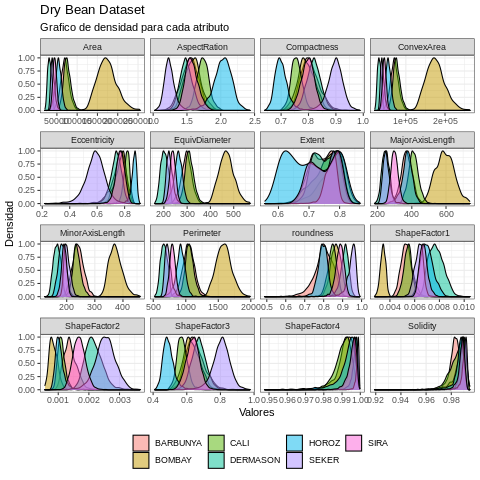

In [59]:
%%R
data %>%
  gather(Attributes, value, 1:16) %>%
  ggplot(aes(x=value, fill=Class, ..scaled..)) +
  geom_density(colour="black", alpha=0.5) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Valores", y="Densidad",
       title="Dry Bean Dataset",
       subtitle="Grafico de densidad para cada atributo") +
  theme_bw() +
  theme(legend.position="bottom",
        legend.title=element_blank())

## Diagrama de correlacion
Se realiza el diagrama de correlacion entre los 16 atributos de los frijoles,donde es posible destacar el hecho de que varios atributos esten fuertemente correlacionados entre si, lo cual es de esperarse debido a que todos los atributos ayudan a describir la forma del frijol y existen atributos que estan construidos con base en otros atributos. El hecho de que muchos atributos se encuentren muy correlacionados entre si, nos permite concluir que es muy probable que muchos de estos atributos se puedan juntar en un solo componente al realizar un subsecuente analisis de componente principales.

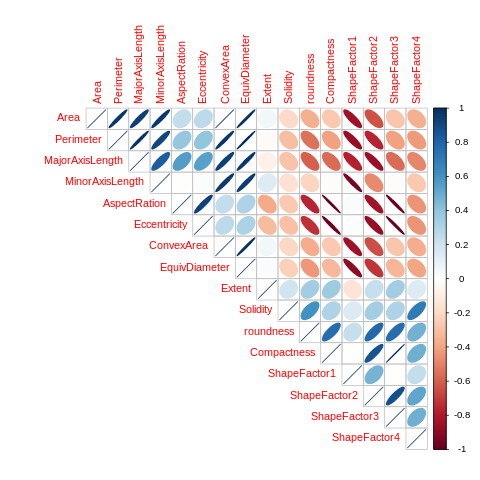

In [33]:
%%R
data$Clase <- NULL
corrplot(cor(data[,-17]),type="upper", method="ellipse", tl.cex=0.9)

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



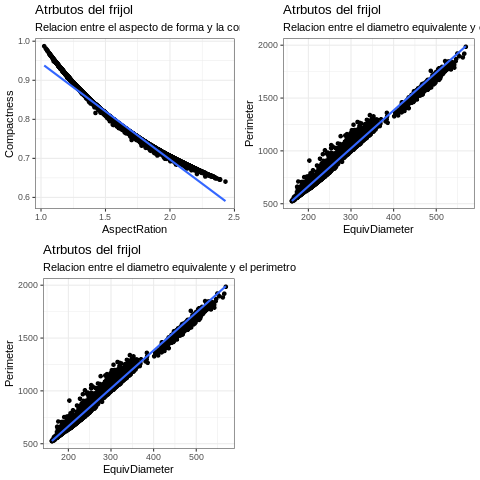

In [39]:
%%R
disp1 <- ggplot(data, aes(x=AspectRation, y=Compactness)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  labs(title="Atrbutos del frijol",
       subtitle="Relacion entre el aspecto de forma y la compacidad") +
  theme_bw()

disp2 <- ggplot(data, aes(x=EquivDiameter, y=Perimeter)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  labs(title="Atrbutos del frijol",
       subtitle="Relacion entre el diametro equivalente y el perimetro") +
  theme_bw()

disp3 <- ggplot(data, aes(x=EquivDiameter, y=Perimeter)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  labs(title="Atrbutos del frijol",
       subtitle="Relacion entre el diametro equivalente y el perimetro") +
  theme_bw()

  grid.arrange(disp1, disp2, disp3, nrow = 2)

In [ ]:
%%R 
#Prueba Git